<a href="https://colab.research.google.com/github/kunalmahadik/Book-Recommendation-System/blob/main/Book_Recommendation_System_Capstone_Project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**

## <b><u>Problem Statement: </u></b>

####During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.


####In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
####Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

####Personal recommendation systems have been emerged to conduct effective search which related booksbased on user rating and interest.The proposed system used the K-NN Cosine Distance function to measure distance and Cosine Similarity function to find Similarity between the book clusters also we implemented SVD system that give us good recommandation.

## **About Recommendation Engines**
A recommendation engine, also known as a recommender system, is software that analyzes available data to make suggestions for something that a user might be interested in.

A recommendation engine can be used for recommending other products besides books; for example a recommendation engine can be used to suggest movies or t-shirts or any other product based on things like similar customers who bought similar products. On Amazon’s ecommerce website, you can see an area populated by a recommendation engine, it’s the area that you see “Customers who viewed this item also viewed” and “Customers who bought this item also bought” lists.

A recommendation system is usually built using 3 techniques which are **content-based filtering, collaborative filtering, and a combination of both**.

* **Content-based filtering**: 
The algorithm recommends a product that is similar to those which used as watched. In simple words, In this algorithm, we try to find finding item look alike. For example, a person likes to watch Sachin Tendulkar shots, so he may like watching Ricky Ponting shots too because the two videos have similar tags and similar categories.
Only it looks similar between the content and does not focus more on the person who is watching this. Only it recommends the product which has the highest score based on past preferences.

* **Collaborative filtering:**
Collaborative based filtering recommender systems are based on past interactions of users and target items.  In simple words here, we try to search for the look-alike customers and offer products based on what his or her lookalike has chosen. Let us understand with an example. X and Y are two similar users and X user has watched A, B, and C movie. And Y user has watched B, C, and D movie then we will recommend A movie to Y user and D movie to X user.
Youtube has shifted its recommendation system from content-based to Collaborative based filtering technique. If you have experienced sometimes there are also videos which not at all related to your history but then also it recommends it because the other person similar to you has watched it.

* **Hybrid Filtering Method:**
It is basically a combination of both the above methods. It is a too complex model which recommends product based on your history as well based on similar users like you.
There are some organizations that use this method like Facebook which shows news which is important for you and for others also in your network and the same is used by Linkedin too.


###In this project, we will use the **Collaborative based filtering** method to build a book recommender system.

##**Dataset Description**
The Book-Crossing dataset comprises 3 files which contains 1.1 million ratings of 270,000 books by 90,000 users. The ratings are on a scale from 1 to 10.

* **Users**
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.
*  **Books**
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.
*  **Ratings**
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

### **Importing libraries**

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import scipy
import math
import random
import sklearn

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from surprise import Reader, Dataset, SVD, model_selection, accuracy
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option('display.max_colwidth', -1)

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Mounting drive to google coalb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing dataset**

In [ ]:
#Reading Users data
users = pd.read_csv('/content/drive/MyDrive/AlmaBetter/dataset/Users.csv' ,sep=",",error_bad_lines=False, encoding='latin-1')

#Reading Books data
books = pd.read_csv('/content/drive/MyDrive/AlmaBetter/dataset/Books.csv',sep=",",error_bad_lines=False, encoding='latin-1')

#Reading Ratings data
ratings = pd.read_csv('/content/drive/MyDrive/AlmaBetter/dataset/Ratings.csv',sep=",",error_bad_lines=False, encoding='latin-1')

In [ ]:
#checking shapes of the datasets
print(f'There are {books.shape[0]} records and {books.shape[1]} features in the books dataset')
print(f'There are {users.shape[0]} records and {users.shape[1]} features in the users dataset')
print(f'There are {ratings.shape[0]} records and {ratings.shape[1]} features in the ratings dataset')

There are 271360 records and 8 features in the books dataset
There are 278858 records and 3 features in the users dataset
There are 1149780 records and 3 features in the ratings dataset


In [ ]:
# Lets check out top 5 records in the each dataframe
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
#checking the description of the books dataset
books.describe().T

,count,unique,top,freq
ISBN,271360,271360,0195153448,1
Book-Title,271360,242135,Selected Poems,27
Book-Author,271359,102023,Agatha Christie,632
Year-Of-Publication,271360,202,2002,13903
Publisher,271358,16807,Harlequin,7535
Image-URL-S,271360,271044,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,2
Image-URL-M,271360,271044,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,2
Image-URL-L,271357,271041,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg,2


In [ ]:
#checking top 5 rows of books dataframe
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
#checking description of the users dataset
users.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,278858.0,139429.500000,80499.515020,1.0,69715.25,139429.5,209143.75,278858.0
Age,168096.0,34.751434,14.428097,0.0,24.00,32.0,44.00,244.0


In [ ]:
#checking top 5 rows
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
##checking description of the users dataset
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


## **Data Preprocessing and EDA**


### *Renaming the columns*

First, we will rename the columns of each file. Because the name of the column contains space, and uppercase letters so we will correct as to make it easy to use.Let's simplified the column names.

In [ ]:
# Renaming column name of 'books', 'users' & 'ratings' dataset
books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

>### Data Cleaning : Book Dataset

In [ ]:
#Printing Top 5 rows of book data
books.head()

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


Now in the books dataset, we have some extra columns which are not required for our task like Image-URL-S, Image-URL-M and Image-URL-L.



In [ ]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
#Now the books datasets looks like...
books.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
#Checking data types of features
print(books.dtypes)

ISBN         object
title        object
author       object
year         object
publisher    object
dtype: object


In [ ]:
#Get the unique values of Year-Of-Publication	
books.year.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen, there are some incorrect entries in this field. It looks like Publisher names '**DK Publishing Inc**' and '**Gallimard**' have been incorrectly loaded as year in dataset due to some errors in csv file. Some entries are strings. 

In [ ]:
#locating the rows having 'DK Publishing Inc' and 'Gallimard' as year, since it seems like discripency
books.loc[(books.year == 'DK Publishing Inc') |( books.year == 'Gallimard'),:]

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?ÃÂ©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


From the above code, it is clear that the title and  authors were concatenated resulting in **mismatch of all the columns ahead which needs to be corrected**.  Also, we can also see there are many special charaters in the title features which needs to be replaced.

In [ ]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','year'] = 2000
books.loc[books.ISBN == '0789466953','author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [ ]:
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','year'] = 2000
books.loc[books.ISBN == '078946697X','author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [ ]:
#ISBN '2070426769'
books.loc[books.ISBN == '2070426769','year'] = 2003
books.loc[books.ISBN == '2070426769','author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [ ]:
#confirming whether the changes are updated.
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X') | (books.ISBN == '2070426769'),:]

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [ ]:
#Now we should find and replace all the special characters
sp_char = {'í':'i', 'á':'a', '©':'c','Ã':'A','Â':'A','&amp;':' '}

books.replace(sp_char, regex=True, inplace=True)

##confirming whether the changes are updated.
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X') | (books.ISBN == '2070426769'),:]

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClA?Aczio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [ ]:
# Correcting the dtypes of year

#errors = coerce indicates that invalid parsing will be set as NaN
books.year = pd.to_numeric(books.year, errors='coerce')

In [ ]:
#reconfirming the datatype update
books.year.dtype

dtype('int64')

In [ ]:
## Uppercasing all alphabets in ISBN, if in case any in lower case
books['ISBN'] = books['ISBN'].str.upper()

In [ ]:
#Retriving the minimum and the maximum year

print(f'The range of the publication year is {books.year.min()}-{books.year.max()}\n')

# Printing unique sorted years of books
print(sorted(books['year'].unique()))



The range of the publication year is 0-2050

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


*Since, the given range seems quite impractical* as it indicates some error since year 0 is impractical so as the year more than 2025 as the book publisher practically will not plan to publish the books for more than 5 year in coming future. **To address this, we mark the rows having values apart the mentioned appraoch,  as Nan and fill with them median values.**

In [ ]:
# Setting year 0 and years above 2025 as nan
books.loc[(books['year'] > 2025) | (books['year']==0),'year'] = np.NAN

In [ ]:
# Printing unique sorted years of books to reconfirm the changes
print(sorted(books['year'].unique()))

[1920.0, 1941.0, 1942.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1956.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, nan, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1955.0, 1957.0, 1967.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0, 2024.0]


Now, we can observe that the range of year got more confined, *starting from year 1920 to year 2021* which makes sense.

>>**Missing Value Analysis** 

 Handling missing data is important as many machine learning algorithms **do not support data with missing values.**

In [ ]:
#checking for any missing values
books.isnull().sum()

ISBN         0   
title        0   
author       1   
year         4630
publisher    2   
dtype: int64

There are 4690 missing values in the year feature.

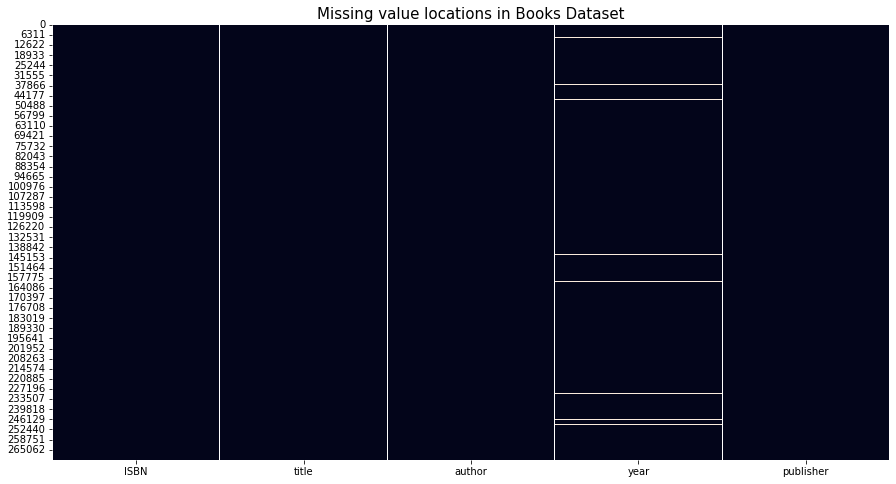

In [ ]:
# Let's visualize the location of missing values via heat map
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Missing value locations in Books Dataset', fontsize = 15)
sns.heatmap(books.isnull(), cbar=False, ax=ax)
plt.show()

In [ ]:
#Replacing the nan values with medain values of year 
books['year'].fillna(round(books['year'].median()),inplace=True)

In [ ]:
#rechecking
print(f'Null values in the year column of books dataset is: {books.year.isnull().sum()}')


Null values in the year column of books dataset is: 0


In [ ]:
#Resetting the dtype as int32
books.year = books.year.astype(np.int64)

In [ ]:
#checking the 2 rows having null values in the publisher column
books.loc[books.publisher.isnull(),:]

,ISBN,title,author,year,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
#Replacing these rows with missing values with 'unknown' as we don't know the publisher details for these rows.
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'unknown'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'unknown'

In [ ]:
# There was 1 null value in the author column, so we can either impute it with 'unknown' or could also drop the row,since it won't affect the dataset.Hence, we are dropping it. 
books.dropna(axis=0,inplace=True)

In [ ]:
#Checking for the missing value
print(f'Null values in the books dataset is:{books.isnull().any().sum()}')

Null values in the books dataset is:0


In [ ]:
#Print a concise summary of a books DataFrame
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271359 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271359 non-null  object
 1   title      271359 non-null  object
 2   author     271359 non-null  object
 3   year       271359 non-null  int64 
 4   publisher  271359 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.4+ MB


>> **Checking duplicated values**

In [ ]:
# Checking for any duplicate values 
print(f'There are {len(books[books.duplicated()])} duplicate records in the books data')

There are 313 duplicate records in the books data


> ### Data Cleaning: Users dataset

In [ ]:
#Printing Top 5 rows of the dataset
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# getting info about user data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
# Checking unique values of user_id
users.user_id.unique()
#it can be seen that these are unique

array([     1,      2,      3, ..., 278856, 278857, 278858])

>>**Missing Values Analysis**

In [ ]:
#let's go into the dataset to find out the percentage of missing value in the dataset
missing_data = pd.DataFrame([users.isnull().sum(),users.isnull().sum()*100.0/users.shape[0]]).T #calculating missing values
missing_data.columns = ['No. of Missing Data', '% Missing Data'] #defining column name of the dataframe
missing_data #printing it

,No. of Missing Data,% Missing Data
user_id,0.0,0.000000
location,0.0,0.000000
age,110762.0,39.719857


The **age** feature has ~39% missing values, which needs to be handled.



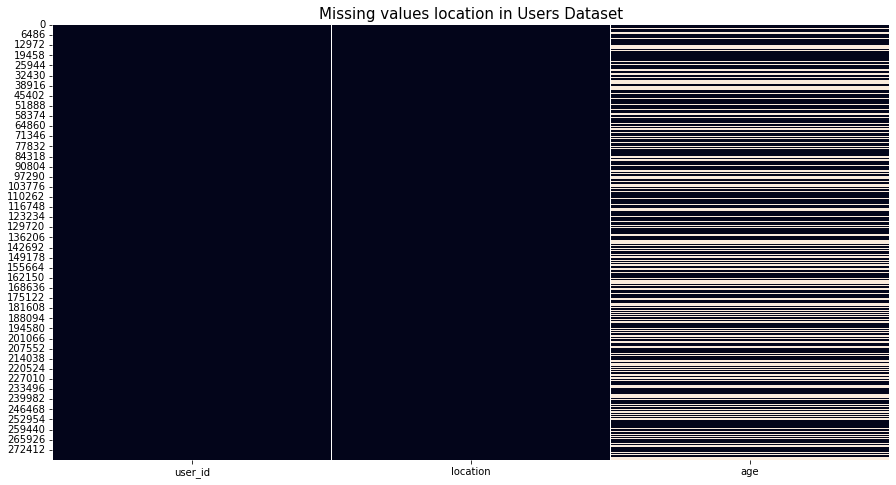

In [ ]:
# Let's visualize the location of missing values
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Missing values location in Users Dataset', fontsize = 15)
sns.heatmap(users.isnull(), cbar=False, ax=ax)
plt.show()

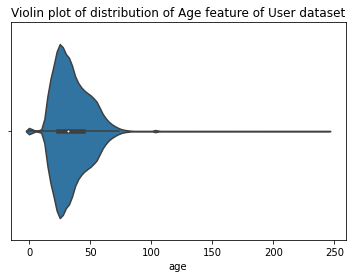

As it is clearly visible we need to process it 



In [ ]:
#violin plot will be the best choice to get understading of outlers and the distribution.
sns.violinplot(users.age)

plt.title('Violin plot of distribution of Age feature of User dataset')
plt.show()
print('As it is clearly visible we need to process it \n')

In [ ]:
# Getting unique age values in sorted manner
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [ ]:
#getting statistical information about the age column of users dataset
users.age.describe()

count    168096.000000
mean     34.751434    
std      14.428097    
min      0.000000     
25%      24.000000    
50%      32.000000    
75%      44.000000    
max      244.000000   
Name: age, dtype: float64

A book read by an infant baby as well as very older aged person doesn't quite makes sense and henceforth some of the entries seems impractical. So,**we will not consider them for analysis** and replace the age <5 years and age >90 with NAN values followed by the mean value of the feature to impute NANs as it is a contineous data..

In [ ]:
# Replacing age below 5 and above 90 by NaNs
users.loc[(users.age > 90) | (users.age < 5), 'age'] = np.nan

In [ ]:
#Now, Replacing NaNs with mean
users['age'].fillna((users['age'].mean()), inplace=True)

In [ ]:
#setting the data type as int
users.age = users.age.astype(np.int64)

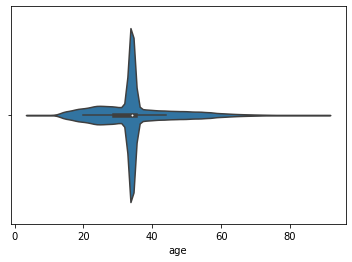


 Because of imputation with mean, we got this kind of heavily point centric distribution. This can be explored further for better approach for imputaion.



In [ ]:
#violin plot will be the best choice to get understading of outlers and the distribution.
sns.violinplot(users.age)

plt.show()

print('\n Because of imputation with mean, we got this kind of heavily point centric distribution. This can be explored further for better approach for imputaion.\n')

In [ ]:
users.location.value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany    1   
-, bayern, germany                               1   
bouchegouf, guelma, algeria                      1   
indiana and philadelphia, pennsylvania, usa      1   
tacoma, washington, united kingdom               1   
Name: location, Length: 57339, dtype: int64

In [ ]:
#Now lets extract the city column
for i in users:
    users['country']=users.location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

#checking the sum of mssing values in the country column    
print(f'there are total missing  values in country column is :{users.country.isna().sum()}')

#now, we will replace all the null value with 'not_defined'.
users['country'].fillna('not_defined', inplace = True)


'''
Actually, we could have found out each and every row and could possibly extract every country from the location column but for this project we are limiting ourselves and mark them 
as 'not_defined'. \n
'''

there are total missing  values in country column is :450


"\nActually, we could have found out each and every row and could possibly extract every country from the location column but for this project we are limiting ourselves and mark them \nas 'not_defined'. \n\n"

In [ ]:
#extracting city, state and country column from the location feature ussing regex
newlist = users.location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(newlist)):
    if newlist[i][0] == ' ' or newlist[i][0] == '' or newlist[i][0]=='n/a' or newlist[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(newlist[i][0].lower())

    if(len(newlist[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if newlist[i][1] == ' ' or newlist[i][1] == '' or newlist[i][1]=='n/a' or newlist[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(newlist[i][1].lower())
        
        if(len(newlist[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if newlist[i][2] == ''or newlist[i][1] == ',' or newlist[i][2] == ' ' or newlist[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(newlist[i][2].lower())
        
#users = users.drop('Location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4659
16044


In [ ]:
#checking null values in these new added features
print('country', users.country.isna().sum())
print('city', users.country.isna().sum())
print('state', users.country.isna().sum())

country 0
city 0
state 0


In [ ]:
# Users dataset information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   278858 non-null  int64 
 1   location  278858 non-null  object
 2   age       278858 non-null  int64 
 3   country   278858 non-null  object
 4   City      278858 non-null  object
 5   State     278858 non-null  object
 6   Country   278858 non-null  object
dtypes: int64(2), object(5)
memory usage: 14.9+ MB


>> **Checking duplicate values**

In [ ]:
# Checking for any duplicate values 
print(f'There are {len(users[users.duplicated()])} duplicate records in the users dataset')


There are 0 duplicate records in the users dataset


> ### Data Cleaning: Ratings Dataset

In [ ]:
# Printing top 5 rows of ratings dataset
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


***Let's see how many users have given ratings and extracting those users who have given more than 200 ratings.***

In [ ]:
# Value counts of user_id
ratings['user_id'].value_counts()

11676     13602
198711    7550 
153662    6109 
98391     5891 
35859     5850 
          ...  
116180    1    
116166    1    
116154    1    
116137    1    
276723    1    
Name: user_id, Length: 105283, dtype: int64

In [ ]:
#Getting unique values 
ratings.rating.unique()
#it can be seen that these are unique and has range between 0-10

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

The range of the ratings from 0-10.

In [ ]:
# checking for missing values
print(f'Total missing values in the ratings dataset is: {ratings.isnull().sum().sum()}')


Total missing values in the ratings dataset is: 0


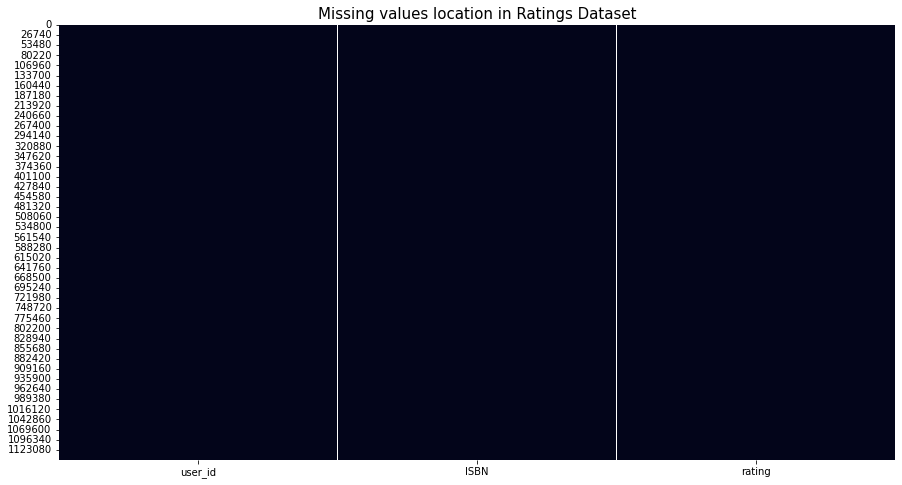

In [ ]:
# Let's visualize the location of missing values
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Missing values location in Ratings Dataset', fontsize =15)
sns.heatmap(ratings.isnull(), cbar=False, ax=ax)
plt.show()

***There are no missing values in the ratings dataset.***

Now, We'll only take the **ISBNs** that also belongs to the main **books** dataset to match both the datasets.

In [ ]:
 #Creating dataframe which contains books that are only in books dataset
unique_ratings = ratings[ratings.ISBN.isin(books.ISBN)]

Ratings dataset should have ratings from users which exist in users dataset, unless new users or book are added to users dataset

In [ ]:
# Creating dataframe which contains user rating data that are aligning with the users dataset
ratings = ratings[ratings.user_id.isin(users.user_id)]

In [ ]:
## Uppercasing all alphabets in ISBN
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [ ]:
#Lets create a new dataframe which has similar userid and ISBN number mapped with each other
# final_dataset = pd.merge(books, ratings, on='ISBN', how='inner')
# final_dataset = pd.merge(final_dataset, users, on='user_id', how='inner')
# final_dataset.info()

In [ ]:
# Printing shapes of all the dataset.
print(ratings.shape)
print(unique_ratings.shape)
print(books.shape)
print(users.shape)

(1149780, 3)
(1030616, 3)
(271359, 5)
(278858, 7)


***It can be seen that many rows having book ISBN not part of books dataset got dropped off.***

# **EDA: Data Visualization**


Let's explore the data about how many books,users and their ratings we have in our dataset.

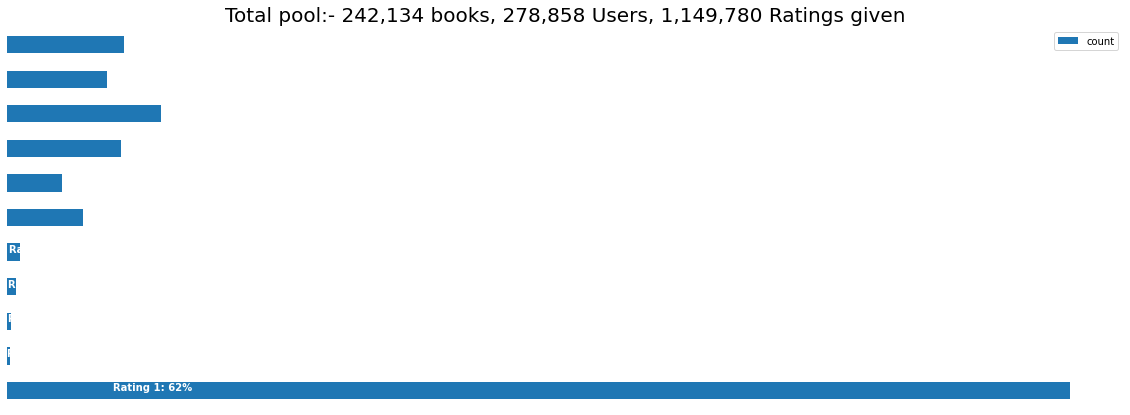

In [ ]:
p = ratings.groupby('rating')['rating'].agg(['count'])

# get book count
products_count = books['title'].nunique()
# get customer count
users_count = users['user_id'].nunique()
# get rating count
rating_count = ratings['rating'].count()
#Plottng graph
ax = p.plot(kind = 'barh', legend = True, figsize = (20,7))
plt.title('Total pool:- {:,} books, {:,} Users, {:,} Ratings given'.format(products_count, users_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/10, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

***Here we can see that we have data.***

***1) Number of books - 242134***
<br>
***2) Number of users -278858***
<br>
***3) Total Number of Ratings- 1149780*** 

Let's explore the Data about Age distrubution of users.

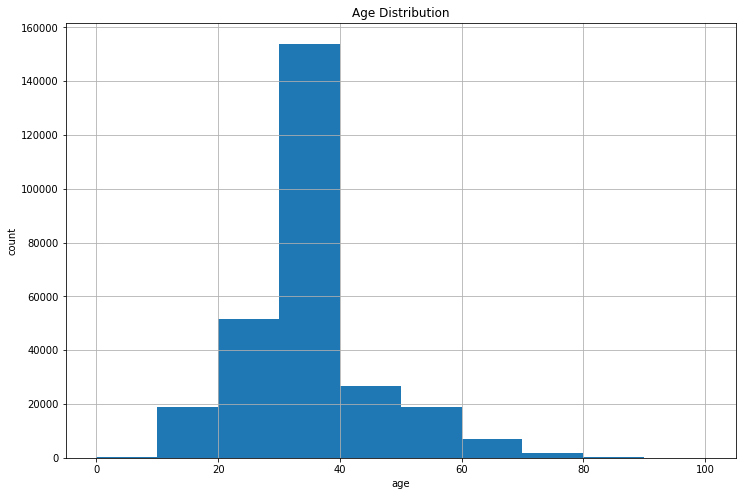

In [ ]:
#Plot histogram to see the distribution of the data
fig = plt.figure(figsize = (12,8))
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

***We can conclude between users with age between 20-40 are highest in number.*** This could be attributed to the mean value imputation at missing values.

Let's see which rating people tend to give more :

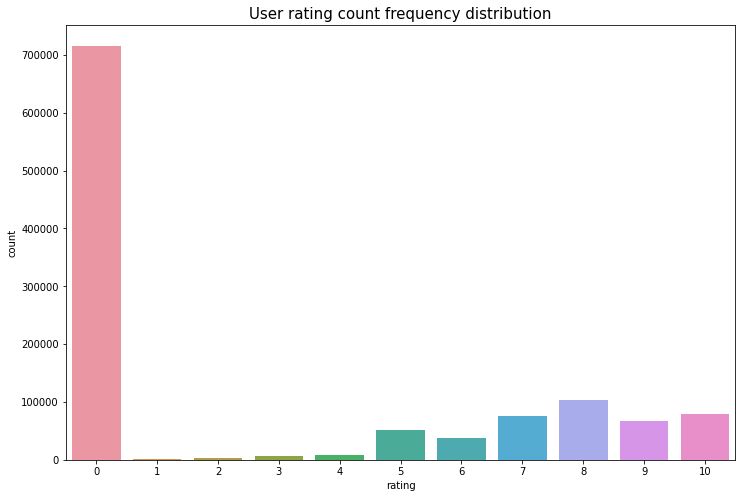

In [ ]:
# Plotting count of rating to see how it's distributed
fig = plt.figure(figsize = (12,8))
sns.countplot(x='rating',data=ratings)
plt.title("User rating count frequency distribution", fontsize =15)
plt.show()

* ***This countplot shows users have rated 0 the most, which can mean they haven't rated books at all.*** If we ignore the rating 0 then 8 was the most common rating given by the user.

####Now we have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

In [ ]:
'''
Since, the most frequent rating was 0 which might indicate that the user haven't rated the book. This may mislead the result.
Hence, we will separate the 0 rated data exclusively for better understanding of the most common user rating.

ratings_explicit = ratings excluding the 0 rating
'''

# Separating ratings
ratings_explicit= unique_ratings[unique_ratings['rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['rating'] == 0]

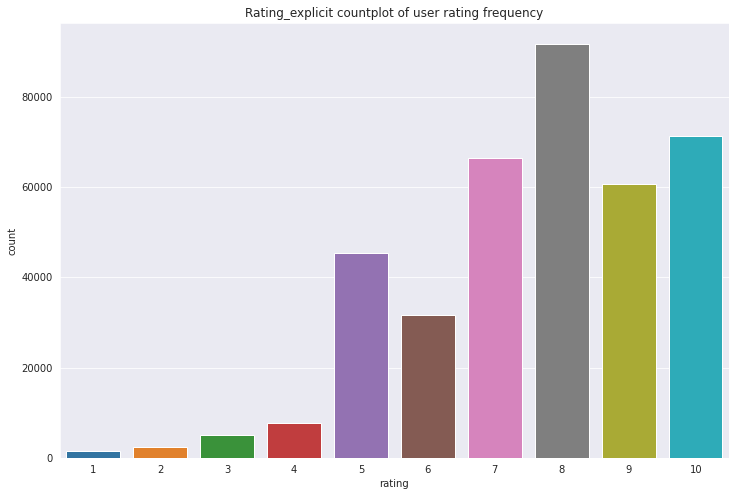

In [ ]:
# Now plotting countplot of rating_explicit
fig = plt.figure(figsize = (12,8))
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='rating')
plt.title("Rating_explicit countplot of user rating frequency")
plt.show()

***Now, This countplot of rating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times then 10 & 7.***

####Year of Publication

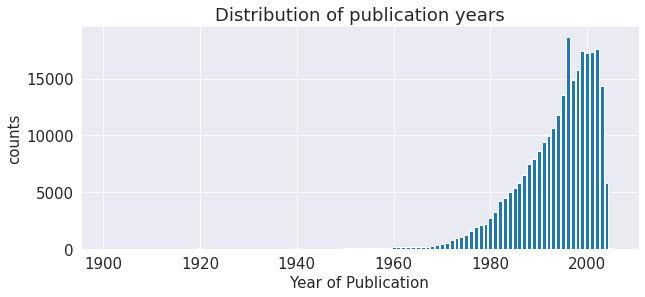

In [ ]:
# Plotting bar plot

years = books.year.value_counts().sort_index()
years = years.where(years>5) 
plt.figure(figsize=(10, 9))
plt.rcParams.update({'font.size': 15}) 
plt.subplot(2,1,1)
plt.bar(years.index, years.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.title("Distribution of publication years")
plt.show()


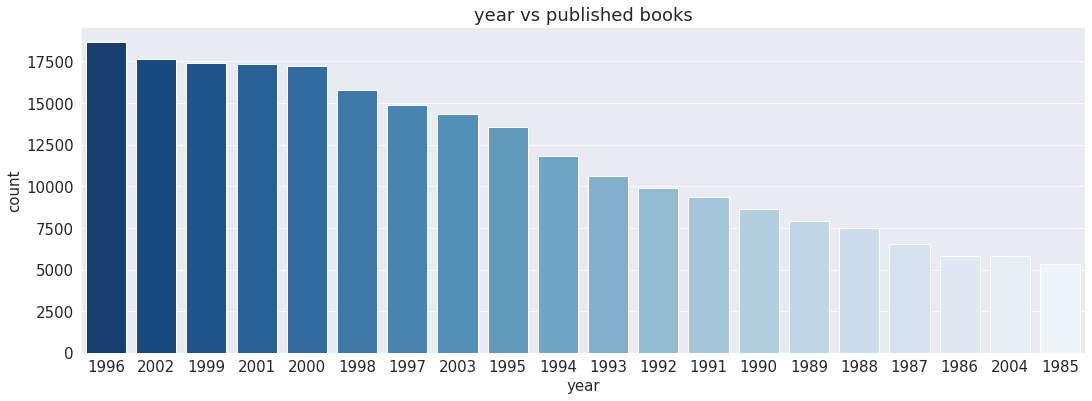

In [ ]:

plt.figure(figsize=(18,6))
sns.countplot(x='year',data=books,order=pd.value_counts(books['year']).iloc[:20].index, palette = sns.color_palette('Blues_r',20))
plt.title('year vs published books')
plt.show()

Let's explore about Users-Locality

In [ ]:
users['location'].value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany    1   
-, bayern, germany                               1   
bouchegouf, guelma, algeria                      1   
indiana and philadelphia, pennsylvania, usa      1   
tacoma, washington, united kingdom               1   
Name: location, Length: 57339, dtype: int64

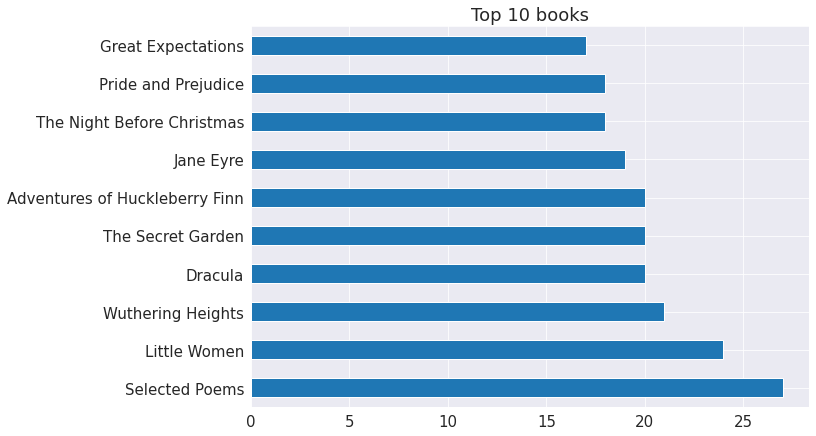

In [ ]:
# Top 10 Products
ax = books['title'].value_counts()[:10].plot(kind = 'barh', legend = False, figsize = (10,7))
plt.title('Top 10 books') 
plt.show()

***From above graph we can see that selected poems is topmost book .Bar plot shows us popular books.***

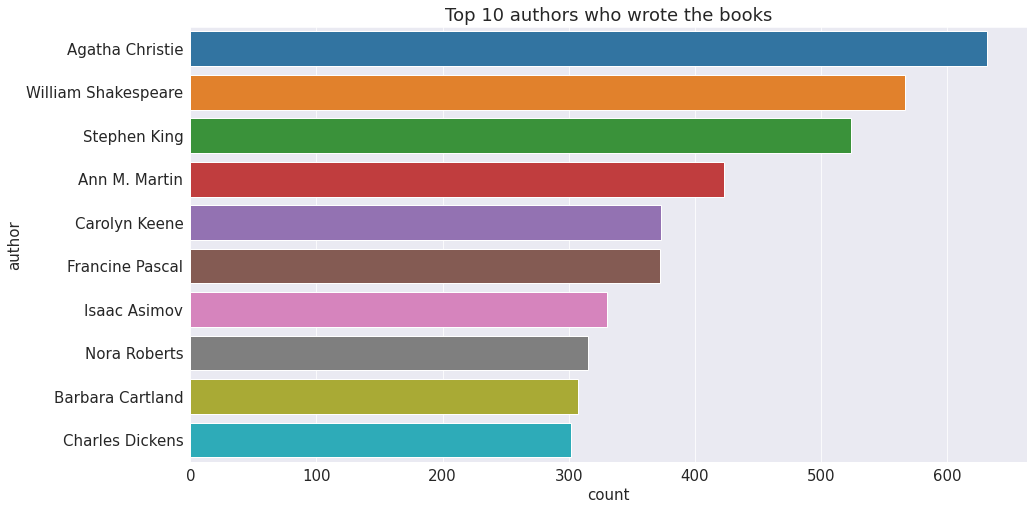

In [ ]:
#Let's explore about authors
plt.figure(figsize=(15,8))
sns.countplot(y="author", data=books,order=books['author'].value_counts().index[0:10])
plt.title("Top 10 authors who wrote the books")
plt.show()

***From above bar plot we can see that autors Agatha Christie, William Shakespeare, Stephen King, Ann M. Martin,Carolyn keene are top authors.***

In [ ]:
#getting counts of the books of the top authors
pd.value_counts(books['author']).iloc[:10]

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: author, dtype: int64

Msot of the books were published in the year 1996-2002

In [ ]:
#percetnage of top publishers
pd.value_counts(books['publisher'],normalize=True).iloc[:10]*100

Harlequin                   2.776764
Silhouette                  1.555135
Pocket                      1.439053
Ballantine Books            1.394094
Bantam Books                1.343608
Scholastic                  1.164509
Simon   Schuster            1.094860
Penguin Books               1.048058
Berkley Publishing Group    1.021156
Warner Books                1.004942
Name: publisher, dtype: float64

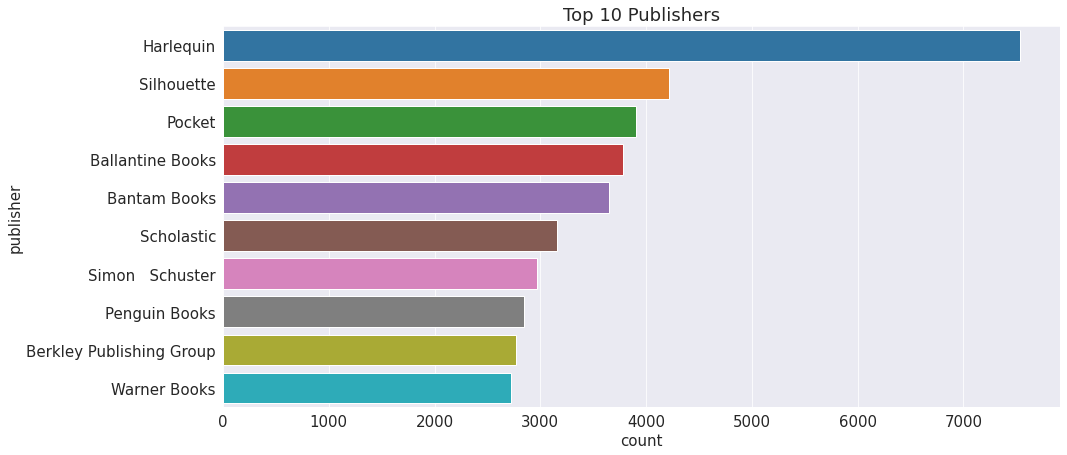


 
 
Harlequin, Silhoutte and Pocket were the top publishers


In [ ]:
#visualising top publishers
plt.figure(figsize=(15,7))
sns.countplot(y='publisher',data=books,order=pd.value_counts(books['publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')
plt.show()

print('\n \n \nHarlequin, Silhoutte and Pocket were the top publishers')

In [ ]:
from wordcloud import WordCloud,STOPWORDS

author_string = " ".join(books['author'].astype(str))
title_string = " ".join(books['title'].astype(str))
publisher_string = " ".join(books['publisher'].astype(str))
stop_words = set(STOPWORDS)

def wordcloud(string,title ="unknown"):
    wc = WordCloud(width=800,height=500,mask=None,background_color ='white',random_state=21,
                   stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.title(title)
    plt.axis('off')
    plt.imshow(wc)

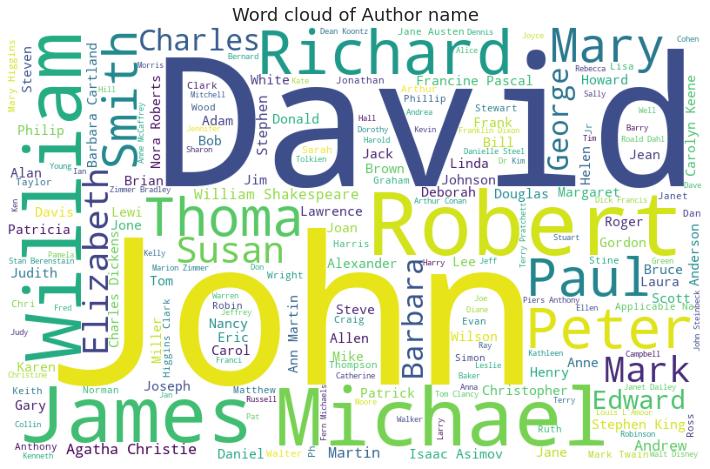

In [ ]:
wordcloud(author_string,'Word cloud of Author name')

As we can see, David,Robert,John,James are some of the most famous authors who authored books

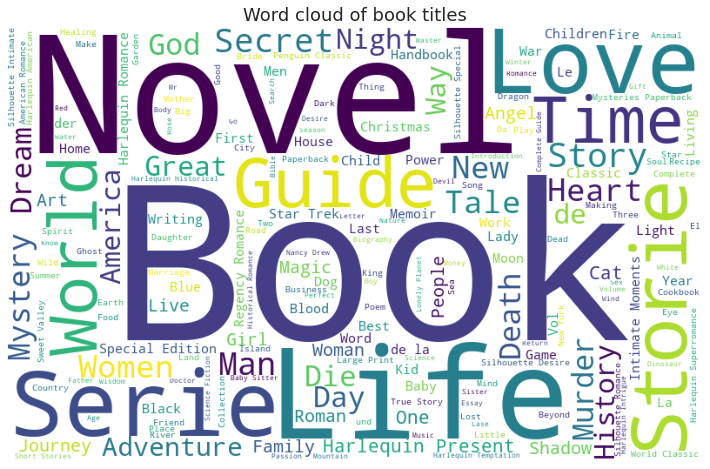

In [ ]:
wordcloud(title_string,'Word cloud of book titles')

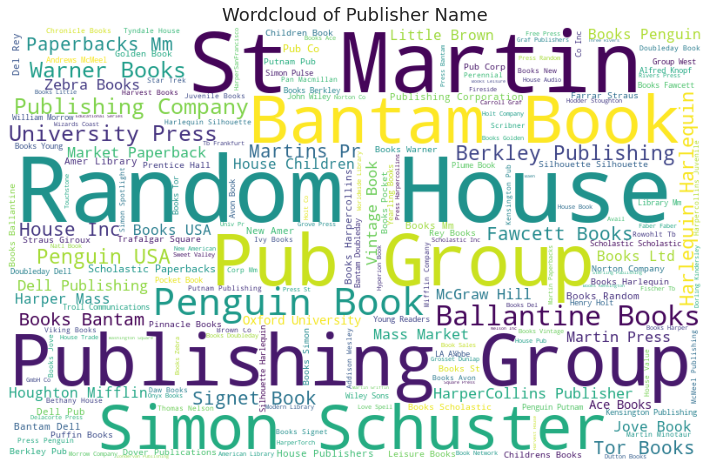

In [ ]:
wordcloud(publisher_string,'Wordcloud of Publisher Name')

Text(0.5, 1.0, 'Top 10 country wise readers')

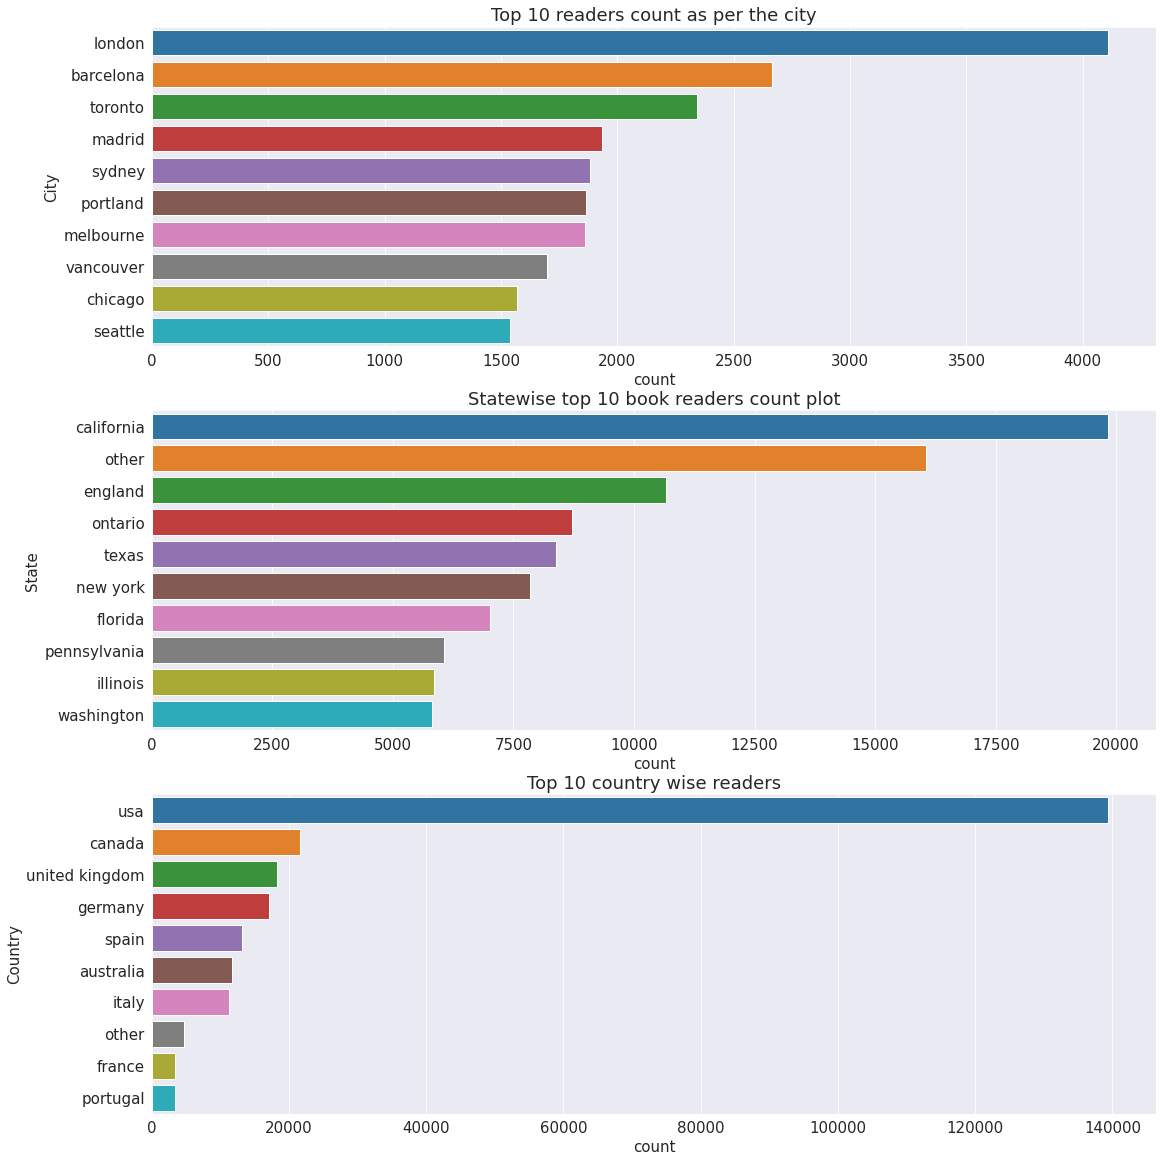

In [ ]:
plt.figure(figsize=(18,20))
plt.subplot(3,1,1)
sns.countplot(y="City", data=users,order=users['City'].value_counts().index[0:10])
plt.title("Top 10 readers count as per the city")

plt.subplot(3,1,2)
sns.countplot(y="State", data=users,order=users['State'].value_counts().index[0:10])
plt.title("Statewise top 10 book readers count plot")

plt.subplot(3,1,3)
sns.countplot(y="Country", data=users, order=users['Country'].value_counts().index[0:10])
plt.title("Top 10 country wise readers")

In [ ]:
users['Country'].value_counts(normalize=True)[0:10]*100

usa               49.998566
canada            7.746954 
united kingdom    6.567142 
germany           6.105258 
spain             4.698807 
australia         4.207518 
italy             4.033236 
other             1.670743 
france            1.234320 
portugal          1.188060 
Name: Country, dtype: float64

As it is evident that USA accounts for almost half of the readers, let us explore which state is contributing the most.

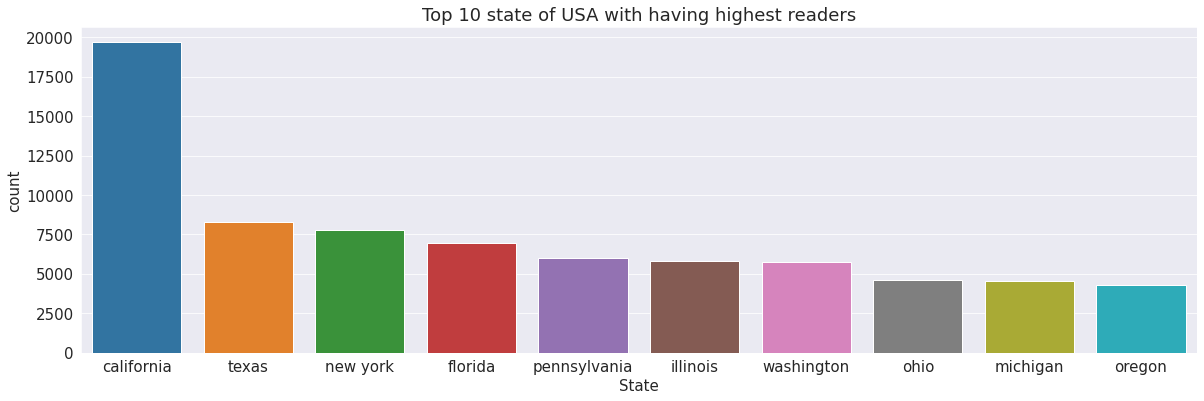

In [ ]:
data=users[users['Country']=='usa']
plt.figure(figsize=(20,6))
sns.countplot(x="State", data=data,order=data['State'].value_counts().index[0:10])
plt.title("Top 10 state of USA with having highest readers")
plt.show()

# **Popularity Based Recommendation(Base model)** 

Now let's try to build our first recommendation system based on popularity.  These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.


In [ ]:
#Top 5 rows of ratings_explicit which does not have zero rated ratings.
ratings_explicit.head()

,user_id,ISBN,rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [ ]:
# Print shapes of unique_ratings and ratings_explicit
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1030616, 3)
(383642, 3)


***We'll only consider ISBNs that were explicitely rated for this recommendation system.***

In [ ]:
# Merging ratings_explicit with books dataset on ISBNs feature
new_book= pd.merge(books, ratings_explicit, on='ISBN')
new_book.head()

,ISBN,title,author,year,publisher,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9


In [ ]:
print(new_book.shape) # get shape

(388986, 7)


In [ ]:
# Grouping group data based on title and aggregate based on rating
top_ten_books= pd.DataFrame(new_book.groupby('title')['rating'].count().sort_values(ascending=False).head(10))

In [ ]:
# Printing top ten books 
print('The top ten books recommendations are :')
top_ten_books

The top ten books recommendations are :


,rating
title,
The Lovely Bones: A Novel,707
A Painted House,646
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),626
Wild Animus,581
Snow Falling on Cedars,530
The Da Vinci Code,494
The Firm,430
Harry Potter and the Order of the Phoenix (Book 5),416
The Secret Life of Bees,406


In [ ]:
top_ten_books=top_ten_books.reset_index() # Reset the index  

In [ ]:
# Print a concise summary of a DataFrame
top_ten_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10 non-null     object
 1   rating  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


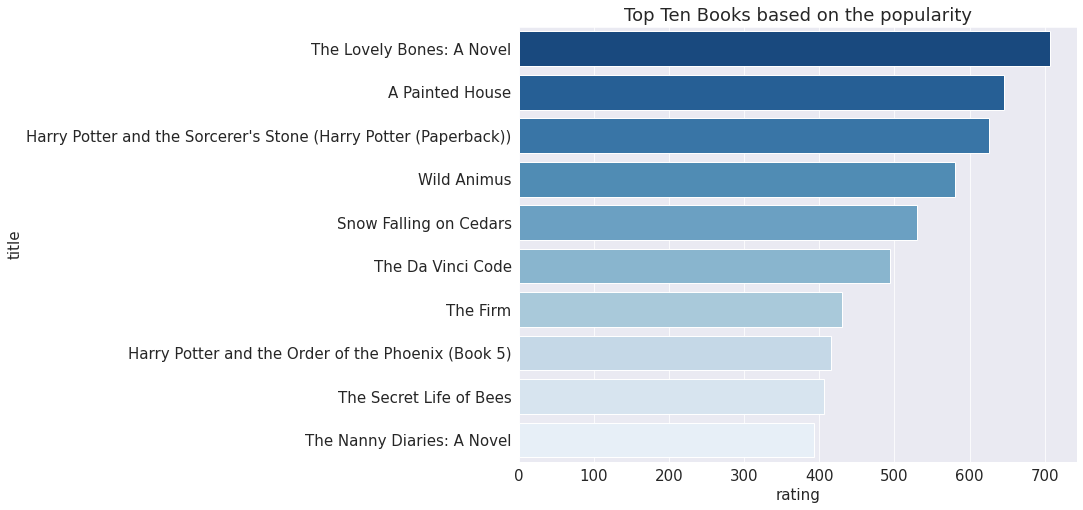

In [ ]:
# Plotting horizontal bar blot
plt.figure(figsize=(10, 8))
g=sns.barplot(x='rating',y='title',data=top_ten_books, orient='h', palette="Blues_r")
plt.title("Top Ten Books based on the popularity")
plt.show()

# **Collaborative Filtering Using KNN ( k-Nearest Neighbors)**

**kNN(k-Nearest Neighbors)** as an algorithm seems to be inspired from real life. The full k-nearest neighbors algorithm works much in the way some of us ask for recommendations from our friends. First, we start with people whose taste we feel we share, and then we ask a bunch of them to recommend something to us. If many of them recommend the same thing, we deduce that we’ll like it as well. Our behaviour is guided by the friends we grew up with.kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. 

#####Here we assume that users who given ratings more than 200 are users who read atleast 20 books(suppose on user given rating 10/10 so minimum he read books(200 ratings/10 ratings per book=20).For statisfical significance we should consider only the data of user who given more than 200 ratings.

To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [ ]:
#our analysis ready dataset
new_book

,ISBN,title,author,year,publisher,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9
...,...,...,...,...,...,...,...
388981,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,275318,10
388982,1845170423,Cocktail Classics,David Biggs,2004,Connaught,275970,7
388983,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,276313,5
388984,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463,7


In [ ]:
#Users with more than 200 ratings 
numbers1 = ratings_explicit['user_id'].value_counts()
ratings = ratings_explicit[ratings_explicit['user_id'].isin(numbers1[numbers1 >= 200].index)]

#Books with more than 100 Ratings
number2 = ratings_explicit['rating'].value_counts()
ratings = ratings_explicit[ratings_explicit['rating'].isin(number2[number2 >= 100].index)]

***The dataset 'Ratings' and 'Books' have common column 'ISBN' so create new dataframe merging the two dataframes.***

In [ ]:
#Merging the dataset ratings and Books
books_with_rating = pd.merge(ratings, books, on='ISBN')

#books_with_rating.drop(books_with_rating.filter(regex='_y$').columns, axis=1, inplace=True)
books_with_rating.head()

,user_id,ISBN,rating,title,author,year,publisher
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday


In [ ]:
books_with_rating.shape

(388986, 7)

***Now we will group by book titles and create a new column for total rating count.***

In [ ]:
rating_count_df =books_with_rating.groupby('title')['rating'].count().reset_index() ## grouping 

In [ ]:
#Print top 5 rows of dataset
rating_count_df.head()

,title,rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
2,Dark Justice,1
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7
4,Final Fantasy Anthology: Official Strategy Guide (Brady Games),2


In [ ]:
#Rename the column rating with total ratings
rating_count_df.rename(columns={'rating':'total_ratings'},inplace=True)

***Now we will combine the books_with_rating with the rating_count_df data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.***

In [ ]:
#Merging the dataframes
totalRatingCount_df = books_with_rating.merge(rating_count_df, left_on = 'title', right_on = 'title', how = 'left')
totalRatingCount_df.head()

,user_id,ISBN,rating,title,author,year,publisher,total_ratings
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,5
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,1
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press,1
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,646
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,646


***We wiil consider the only books having minimum total 50 ratings***.

In [ ]:
#let's keep threshold popularity value 50 
popularity_threshold = 50
rating_popular_book = totalRatingCount_df.query('total_ratings >= @popularity_threshold')
rating_popular_book.head()

,user_id,ISBN,rating,title,author,year,publisher,total_ratings
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,646
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,646
5,16877,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,646
6,17975,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday,646
7,20806,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday,646


####Now it's time to merge the 'users' dataframe with 'rating_popular_book' dataframe 

In [ ]:
#making our final dataset which has explicit rating, and data books which has rated >100 times and users who rated >200 books.
combined = rating_popular_book.merge(users, left_on = 'user_id', right_on = 'user_id', how = 'left')## merging the dataframes

In [ ]:
combined.head()

,user_id,ISBN,rating,title,author,year,publisher,total_ratings,location,age,country,City,State,Country
0,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,646,"torrance, california, usa",34,usa,torrance,california,usa
1,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,646,"n/a, n/a, n/a",34,not_defined,other,other,other
2,16877,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,646,"houston, arkansas, usa",37,usa,houston,arkansas,usa
3,17975,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday,646,"fargo, north dakota, usa",34,usa,fargo,north dakota,usa
4,20806,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday,646,"union, kentucky, usa",34,usa,union,kentucky,usa


In [ ]:
combined.shape

(70163, 14)

In [ ]:
#Comibned dataframe's duplicate values should be drop  
combined.drop_duplicates(['user_id','title'],inplace=True)

In [ ]:
# # importing library
# from sklearn.neighbors import NearestNeighbors
# from scipy.sparse import csr_matrix

In [ ]:
# Creating pivot table
pivot_matrix=combined.pivot(index='title',values='rating',columns='user_id')
# Returning top 5 rows
pivot_matrix.head()

user_id,9,16,26,32,42,51,91,97,99,114,...,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filling Nan values to 0
pivot_matrix.fillna(0, inplace=True)

In [ ]:
#Print top 5 rows of pivot matrix
pivot_matrix

user_id,9,16,26,32,42,51,91,97,99,114,...,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wizard and Glass (The Dark Tower, Book 4)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#csr is compressed sparse matrix since there are lots of NAn-->0
book_sparse = csr_matrix(pivot_matrix)

In [ ]:
# metric used for evaluation is cosine and algorithm is brute
model = NearestNeighbors(metric = 'cosine',algorithm='brute')

In [ ]:
#Let's fit the model 
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
#Generating random book indices out of the book_matrix
random_book = np.random.choice(pivot_matrix.shape[0])
print(random_book)
print(pivot_matrix.iloc[random_book,:].values.reshape(1,-1))
#Apply the k neighbors to fiited model this will create clusters
distances, indices = model.kneighbors(pivot_matrix.iloc[random_book,:].values.reshape(1, -1), n_neighbors = 6)
pivot_matrix.index[random_book]

625
[[0. 0. 0. ... 0. 0. 0.]]


'Three To Get Deadly : A Stephanie Plum Novel (A Stephanie Plum Novel)'

In [ ]:
#Printing the random book name and suggested books.
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_matrix.index[random_book]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i, pivot_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Three To Get Deadly : A Stephanie Plum Novel (A Stephanie Plum Novel):

1: High Five (A Stephanie Plum Novel), with distance of 0.5291600091917078
2: Two for the Dough, with distance of 0.5841845793065943
3: Four To Score (A Stephanie Plum Novel), with distance of 0.5991571260445961
4: Hot Six : A Stephanie Plum Novel (A Stephanie Plum Novel), with distance of 0.6159488836078479
5: Seven Up (A Stephanie Plum Novel), with distance of 0.687512474150778


In [ ]:
#Function to get recommendation for known books from our dataset.
def recommend_books(book_name):
   book_id = np.where(pivot_matrix.index==book_name)[0][0]
   print(book_id)
   distances ,suggestions = model.kneighbors(pivot_matrix.iloc[book_id,:].values.reshape(1,-1),n_neighbors = 6)
   
   for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_matrix.index[book_id]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot_matrix.index[suggestions.flatten()[i]], distances.flatten()[i]))

In [ ]:
#Let's try to get recommandation for book 'The Hobbit'
recommend_books('1984')

0
Recommendations for 1984:

1: Animal Farm, with distance of 0.8441751059913439:
2: Brave New World, with distance of 0.8630224130863633:
3: The Vampire Lestat (Vampire Chronicles, Book II), with distance of 0.9098446731344783:
4: Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death, with distance of 0.9102283484822355:
5: American Psycho (Vintage Contemporaries), with distance of 0.9126168848307201:


####Yes we made it! we have good recommandation here with distances near to value 1.

# **SVD(Singular Value Decomposition) Based recommendation System**

The **SVD(Singular Value Decomposition)** is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. The elements of this matrix are the ratings that are given to items by users.

In [ ]:
# #Installing surprise
# !pip install scikit-surprise

**Surprise** is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

The name **SurPRISE** (roughly) stands for Simple Python Recommendation System Engine.

In [ ]:
# # Importing Reader & Dataset from surprise
# from surprise import Reader, Dataset
# Creating a 'Reader' object to set the limit of the ratings 
reader = Reader(rating_scale=(1, 10))
# Loading our ratings_explicit data
data = Dataset.load_from_df(ratings_explicit, reader)

In [ ]:

# Using the famous SVD algorithm
model = SVD()

# Train on explicit_rating dataset
# Runing 5-fold cross-validation and print results
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6299  1.6441  1.6353  1.6376  1.6347  1.6363  0.0046  
Fit time          23.12   21.19   21.00   21.43   21.11   21.57   0.79    
Test time         0.69    0.62    0.65    1.15    0.64    0.75    0.20    
CPU times: user 1min 56s, sys: 519 ms, total: 1min 57s
Wall time: 1min 58s


{'fit_time': (23.120797634124756,
  21.189512968063354,
  20.99821901321411,
  21.426560163497925,
  21.10604953765869),
 'test_rmse': array([1.62993567, 1.64406842, 1.63527942, 1.63755881, 1.6347061 ]),
 'test_time': (0.6854097843170166,
  0.6243829727172852,
  0.646308422088623,
  1.1527814865112305,
  0.6425912380218506)}

**Train - Test Split**

In [ ]:
# train test split on our data
trainset, testset = model_selection.train_test_split(data, test_size=0.2)
# creating svd model
model = SVD()
# Fit the model
model.fit(trainset)
# Predict the model on test data
predictions = model.test(testset)
# Evaluating model
accuracy.rmse(predictions)

RMSE: 1.6404


1.6404372969931564

We see the RMSE score has improved a lot. It is now on average 1.64 which is pretty good.

**Testing Results**

In [ ]:
# Taking an arbitrary user-id and item-id to test our model.
uid = 276744  
iid = '038550120X'
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.46   {'was_impossible': False}


In [ ]:
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rating= ratings_explicit[(ratings_explicit.user_id==pred.uid) & 
                             (ratings_explicit.ISBN==pred.iid)].rating.values[0]
print(f'The real rating given for this was {actual_rating:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.46.

The real rating given for this was 7.00.


In [ ]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [ ]:
# Predicting modelon testset
pred = model.test(testset)
# top-N recommendation for each user from a set of predictions
top_n = get_top_n(pred)

In [ ]:
#Function to get recommandation by giving user-id as input.
def get_reading_list(userid):
    """
    Retrieve full book titles from full 'books_users_ratings' dataframe
    """
    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title_ = new_book.loc[new_book.ISBN==book].title.unique()[0]
        reading_list[title_] = rating
    return reading_list

In [ ]:
# Just picking a random user_id=116866
example_reading_list = get_reading_list(userid = 116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

Attack Of The Deranged Mutant Killer Snow Goons: 9.107963660878681
Prairyerth: (A Deep Map (A Deep Map): 8.060153301396483
Chaos: Making a New Science: 7.861783227799824
Teach Yourself Web Publishing With Html in a Week (Teach Yourself (Teach Yourself)): 7.8081631581554705
Introduction to ATM Design and Performance: With Applications Analysis Software: 7.8081631581554705
Elementary Statistics: 7.8081631581554705
The Moons of Jupiter: 7.8081631581554705
Granta 52: Food : The Vital Stuff: 7.8081631581554705
The Fractal Geometry of Nature: 7.8081631581554705
The Complete Idiot's Guide to Javascript: 7.8081631581554705


Above recommended books seems pretty much related.

So our first recommender engine is finished.

## **Memory-Based Collaborative Filtering**

Memory-Based Collaborative Filtering are of two kinds:


*   user-item filtering
*   item-item filtering

A user-item filtering will take a particular user and find users that are similar to that user based on similarity of ratings. Then it will recommend items that are similar to the ones the users liked.

Unlike user-item filtering, item-item filtering will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and recommends other items.


*   Item-Item Collaborative Filtering: “Users who liked this item also liked …”
*   User-Item Collaborative Filtering: “Users who are similar to you also liked …”





### **Train - Test Split**

In [ ]:
#printing the rating explicit shape
print(ratings_explicit.shape)

(383642, 3)


In [ ]:
counts1 = ratings_explicit['user_id'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['user_id'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['rating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['rating'].isin(counts[counts >= 100].index)]

In [ ]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(books, test_size=0.20)
'''
CONFIRM
'''

'\nCONFIRM\n'

Now Lets create a new dataframe by merging "books" dataset and "ratings_explicit" dataset



In [ ]:
new_book_df= pd.merge(books, ratings_explicit, on='ISBN')
new_book_df.head()

,ISBN,title,author,year,publisher,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
1,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,110912,10
2,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,197659,9
3,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398,9


In [ ]:

train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.20)

In [ ]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 83361
Testing set lengths: 20841
Test set is 20% of the full dataset.


In [ ]:
# Get int mapping for user_id in train dataset

u_unique_train = train_data.user_id.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for ISBN in train dataset

i_unique_train = train_data.ISBN.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

# Get int mapping for user_id in test dataset

u_unique_test = test_data.user_id.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for ISBN in train dataset

i_unique_test = test_data.ISBN.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [ ]:

# TRAINING SET
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['ISBN'].map(train_data_book2idx)

# TESTING SET
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['ISBN'].map(test_data_book2idx)

# Convert back to 3-column df
train_data = train_data[['u_unique', 'i_unique', 'rating']]
test_data = test_data[['u_unique', 'i_unique', 'rating']]

In [ ]:
train_data.sample(10)

,u_unique,i_unique,rating
67383,40,26157,10
103338,310,16502,10
39968,362,4974,9
48050,31,44898,8
23070,386,2598,9
1145,162,25367,9
16771,249,26555,10
43188,176,49322,10
3488,31,9416,8
14619,166,270,7


### **User-Item Matrix for Train Data**

In [ ]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  # entry[1] is the user-id, entry[2] is the book-isbn
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # -1 is to counter 0-based indexing

In [ ]:
train_matrix.shape

(449, 55842)

### **User-Item Matrix for Test Data**

In [ ]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [ ]:
test_matrix.shape

(449, 17536)

## **Cosine Similarity Based Recommendation System**

As I am doing this calculations on my PC, so it is not a good idea to perform this huge calculation. So I'll perform on a subset initially. It will take a bit of time to calculate.

A distance metric commonly used in recommender systems is cosine similarity, where the ratings are seen as vectors in n-dimensional space and the similarity is calculated based on the angle between these vectors.

To make item-item similarity we need to take the transpose of the matrix.

In [ ]:
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine') 

In [ ]:
# Now we'll define a function to predict the similarity 
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

### **Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 8.019681224093079
User-based CF RMSE: 8.017800038894167


 Our recommendation system gives 7.93 RMSE score,which is not really good. So the best appraoch was **SVD** amongst the model we implemented.

# **Conclusion:**

*  Recommendation system is unturned to exist in the e-commerce businesses with the help of collaborative or content-based filtering to predict different items and yes, users are most satisfied with the products recommended to them. 

*   While performing Exploratory Data Analysis we observed that almost **42%** of readers with **age-34** read more books compared to other age group of readers.

*   Books with publication years are somewhat between **1950 - 2005**.

*   Also the readers mostly give 8 ratings(on scale 1-10) to books followed by 10 and 7.  
*   There are more readers from locations London,england,united kingdom,toronto,ontario,canda cmpare to other locations.

*   KNN model gives good recommendation for books. 
*   The best collaborative book recommender model is **SVD(Singular value decompostion)** with best accuracy on test data which give stronger recommendations.These results show that our proposed system can remove boring
books from the recommendation list more efficiently.


